# Data Science Studio Final Assessment


## Author: Amy Jungmin Seo

### Type: Coursework


### [Equivalent to 5,000 words] Up to five figures and three tables + code + comments + up to 2,000

### Due on Due on 14:00, March 9th 2021

# 1 - Find, prepare & explore a dataset

#### The first step of this assessment is to find a data set that meets the following characteristics. 
#### First of all, the dataset must contain several characteristics for a number of observation. At least two characteristics are continuous and at least two are categorical. 
#### Second of all, the dataset must be workable with clustering methods to tell an interesting story. 
#### Last but not least, the dataset must contain continous characteristics that can be explained in a supervised model as a function of some of the other characteristics. 


#### For this assessment, I chose the Avocado Prices dataset from Kaggle (Available at: https://www.kaggle.com/neuromusic/avocado-prices)

#### I personally love Avocado Toast, and I have found the best Avocado Toast place in Miami. Avocados go well with other types of food, and they 
#### even taste great with rice ! I have been seeing avocados as an interesting type of fruit, but I have never wondered how avocado prices are determined.
#### One thing I noticed is that avocado prices vary from stores to stores and places to places. 

#### While exploring Kaggle, I found this dataset about historical data on avocado prices and sales volume in multiple US markets shared by Justin Kiggins. 
#### The data is originally downloaded from Hass Avocado Board website in May of 2018. 

### Identification of Avocados (Available at: https://loveonetoday.com/how-to/identify-hass-avocados/)

##### Small/Medium Hass Avocado (~3-5oz avocado) | #4046

##### Large Hass Avocado (~8-10oz avocado) | #4225

##### Extra Large Hass Avocado (~10-15oz avocado) | #4770



In [2]:
# Import libraries 

import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the dataset fron local file 

db =  pd.read_csv("../Assessment/avocado.csv")

db.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Data Wrangling

In [4]:
# Change the column "Unnamed: 0" to id 
# PLU stands for Product Lookup codes
db.rename(columns = {'Unnamed: 0':'id', 'Total Volume':'TotalVolume','4046':'Total_Volume_PLU_4046', '4225':'Total_Volume_PLU_4225',\
                     '4770':'Total_Volume_PLU_4770','Total Bags':'TotalBags', 'Small Bags':'SmallBags', 'Large Bags':'LargeBags', \
                     'XLarge Bags':'XLargeBags'}, inplace = True)

db

,id,Date,AveragePrice,TotalVolume,Total_Volume_PLU_4046,Total_Volume_PLU_4225,Total_Volume_PLU_4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
# By visual inspection of the "region" field, I have noticed some grouping of regions such as Total US, West, Southcentral, Northeast, Southeast

db = db[db.region != 'TotalUS']



In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17911 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     17911 non-null  int64  
 1   Date                   17911 non-null  object 
 2   AveragePrice           17911 non-null  float64
 3   TotalVolume            17911 non-null  float64
 4   Total_Volume_PLU_4046  17911 non-null  float64
 5   Total_Volume_PLU_4225  17911 non-null  float64
 6   Total_Volume_PLU_4770  17911 non-null  float64
 7   TotalBags              17911 non-null  float64
 8   SmallBags              17911 non-null  float64
 9   LargeBags              17911 non-null  float64
 10  XLargeBags             17911 non-null  float64
 11  type                   17911 non-null  object 
 12  year                   17911 non-null  int64  
 13  region                 17911 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.0+ 

In [7]:
# Check if there is any missing values

db.isnull().any()

id                       False
Date                     False
AveragePrice             False
TotalVolume              False
Total_Volume_PLU_4046    False
Total_Volume_PLU_4225    False
Total_Volume_PLU_4770    False
TotalBags                False
SmallBags                False
LargeBags                False
XLargeBags               False
type                     False
year                     False
region                   False
dtype: bool

In [8]:
# By running db.info(), I found that "type" and "region" are both object type. I want to move "type" column next to "region". 

col_name = "type"


In [9]:
last_col = db.pop(col_name) # First, remove the data from the dataframe


In [10]:
db.insert((len(db.columns)-1), col_name, last_col)


In [11]:
db # Now that "type" is moved to the second last column from the right. 

,id,Date,AveragePrice,TotalVolume,Total_Volume_PLU_4046,Total_Volume_PLU_4225,Total_Volume_PLU_4770,TotalBags,SmallBags,LargeBags,XLargeBags,year,type,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,conventional,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,conventional,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,conventional,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,conventional,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,organic,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,organic,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,organic,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,organic,WestTexNewMexico


### One-Hot Encoding (using get_dummies) 
#### This process takes categorical variables, and converts it to a numerical representation. 


In [12]:
avocado_type_ds = pd.get_dummies(db["type"])
avocado_type_ds.head()

,conventional,organic
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [13]:
# I do the same thing for "region"

In [14]:
region_ds = pd.get_dummies(db["region"])
region_ds.head()

,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,...,Seattle,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,West,WestTexNewMexico
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# The "Date" column is an object type. Convert this to Datetime then Numeric

db['Date'] = pd.to_datetime(db['Date'], format='%Y-%m-%d')


<ipython-input-15-52ab47879a05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['Date'] = pd.to_datetime(db['Date'], format='%Y-%m-%d')


In [16]:
# Introducing new feature; Month
# Avocado Peak Season: According to http://blog.imperfectfoods.com/blog-1/2019/2/13/when-are-avocados-in-season, 
# Avocado peak season in Mexico is from November to April 
# Avocado peak season in USA is from May to August 


db['Month'] = db['Date'].dt.month


<ipython-input-16-c135ce9a846f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['Month'] = db['Date'].dt.month


In [17]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17911 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     17911 non-null  int64         
 1   Date                   17911 non-null  datetime64[ns]
 2   AveragePrice           17911 non-null  float64       
 3   TotalVolume            17911 non-null  float64       
 4   Total_Volume_PLU_4046  17911 non-null  float64       
 5   Total_Volume_PLU_4225  17911 non-null  float64       
 6   Total_Volume_PLU_4770  17911 non-null  float64       
 7   TotalBags              17911 non-null  float64       
 8   SmallBags              17911 non-null  float64       
 9   LargeBags              17911 non-null  float64       
 10  XLargeBags             17911 non-null  float64       
 11  year                   17911 non-null  int64         
 12  type                   17911 non-null  object        
 13  r

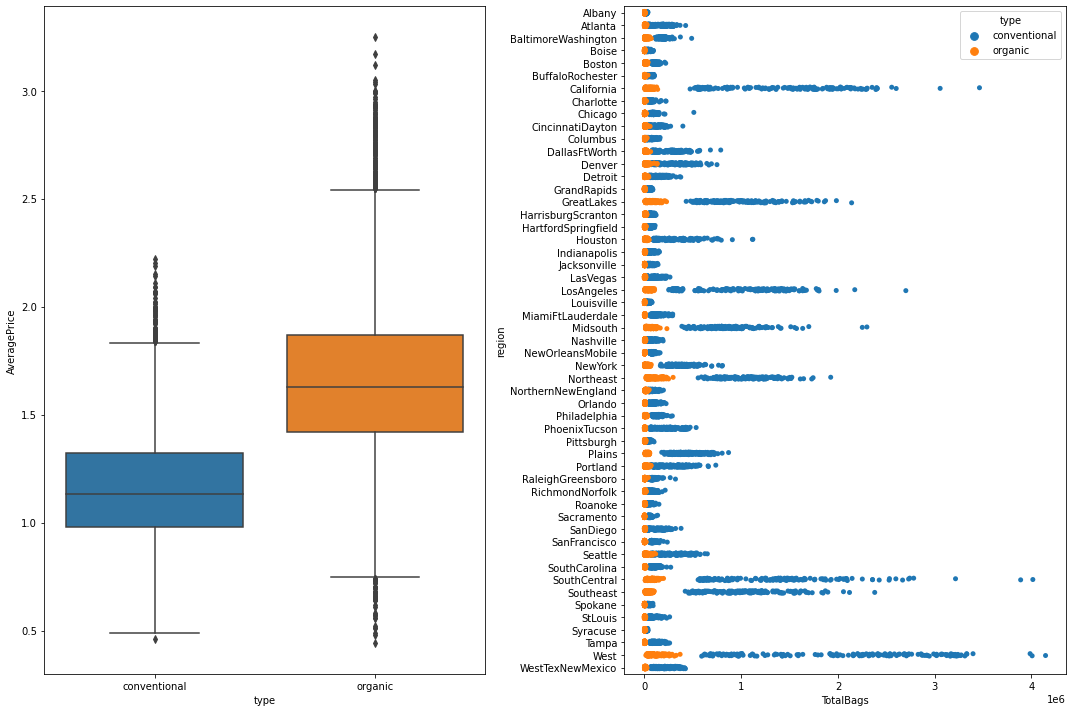

In [21]:
# Preliminary Analysis 

f, axs = plt.subplots(1, 2, figsize = (15,10))

sns.boxplot(x = "type",
            y = "AveragePrice",
            data = db,
           ax=axs[0]);

# Exclude TotalUS from the region 
sns.stripplot(x = "TotalBags",
              y = "region",
              hue = "type",
              data = db,
             ax=axs[1]);

f.tight_layout() 
    
plt.show()

<AxesSubplot:ylabel='Frequency'>

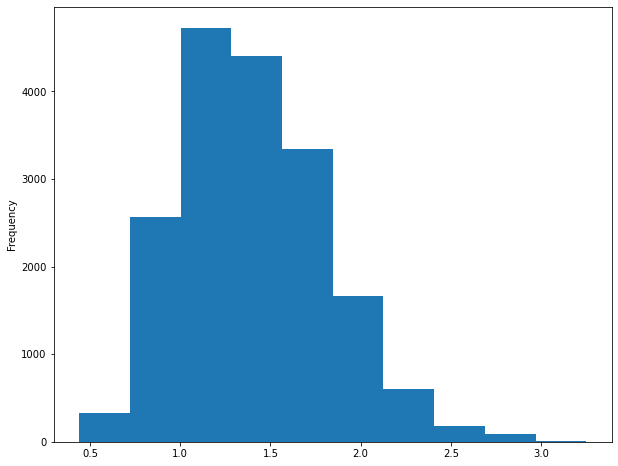

In [22]:
db["AveragePrice"].plot.hist(figsize = (10,8))

<AxesSubplot:xlabel='region'>

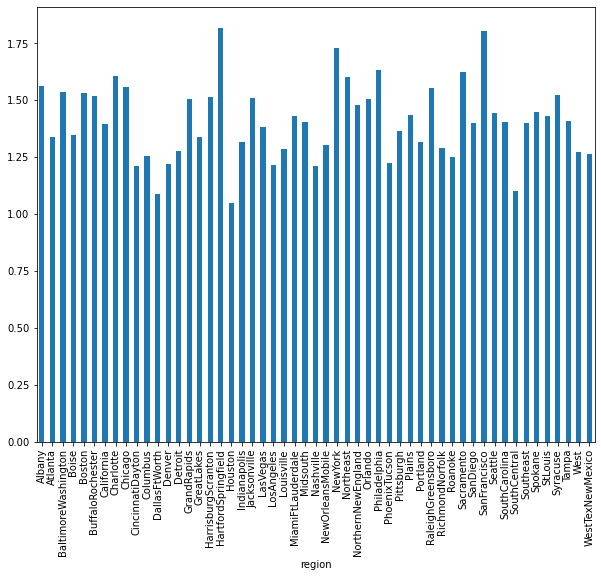

In [23]:

db.groupby("region")\
    ["AveragePrice"]\
    .mean()\
    .plot.bar(figsize = (10,8))


# 2 - Unsupervised learning

#### In this step, a clustering exercise and analyzis will be performed. Several different clustering method will be performed and 

#### critically compared to choose a best performing method.

In [24]:
import sklearn
from numpy.random import seed
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, MinMaxScaler

import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

## A) Non-Spatial Clustering

#### Sometimes, world issues are better understood as multivariate. The goal of using clustering methods is to group the geographical regions that are similar in avocado consumption trend. 


In [25]:
# Select Features 

features = ['TotalVolume','Total_Volume_PLU_4046', 'Total_Volume_PLU_4225', 'Total_Volume_PLU_4770',
           'TotalBags','SmallBags','LargeBags','XLargeBags']



In [26]:
db[features]

,TotalVolume,Total_Volume_PLU_4046,Total_Volume_PLU_4225,Total_Volume_PLU_4770,TotalBags,SmallBags,LargeBags,XLargeBags
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0
...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0


### Kmeans 

#### All raw method

In [27]:
# Making an educated guess about the number of clusters to use; This falling back on guesswork is a major limitation of 
# the K-means clustering algorithm. 

seed(12345)
estimator = KMeans(n_clusters = 5, random_state = 111) 
estimator.fit(db[features])


KMeans(n_clusters=5, random_state=111)

In [28]:
estimator


KMeans(n_clusters=5, random_state=111)

In [29]:
k5_raw = pd.Series(estimator.labels_,
                       index=db.index)


k5_raw.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

#### All Standardized 

In [30]:
from sklearn import preprocessing

# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
db_stded = scaler.fit_transform(db[features])
db_stded = pd.DataFrame(db_stded, columns=features)


In [31]:
# Minus mean, divided by std

pd.DataFrame(db_stded, 
                 index = db.index,
                 columns = features
                ).describe()\
                 .reindex(["mean", "std"])

,TotalVolume,Total_Volume_PLU_4046,Total_Volume_PLU_4225,Total_Volume_PLU_4770,TotalBags,SmallBags,LargeBags,XLargeBags
mean,-0.008948,-0.011025,-0.008422,-0.003275,-0.003590,-0.002897,-0.004550,0.002091
std,0.981689,0.977184,0.978988,1.002037,1.000375,1.001661,0.999994,1.007339


In [32]:
seed(12345)

estimator = KMeans(n_clusters = 5)

estimator.fit(db_stded)

k5_std = pd.Series(estimator.labels_,
                       index=db.index)
k5_std.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

### PCA 

#### Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms a higher-dimensional set of features that could be possibly 
#### Correlated into a lower-dimensional set of linearly uncorrelated features. 

In [33]:
# Standardizing dataset. PCA analysis is affected by the scale, and it is a common practice to normalize the data before feeding it to any machine learning algorithm. 

from sklearn.preprocessing import StandardScaler

dbx = db.loc[:, features].values # returns a numpy array 
dbx = StandardScaler().fit_transform(dbx)


In [34]:
pca_estimator = PCA(n_components = 2)
pca_estimator

PCA(n_components=2)

In [35]:
principalComponents = pca_estimator.fit_transform(dbx)
principalDf = pd.DataFrame(data=principalComponents,
                              columns = ["C-1", "C-2"])

principalDf

,C-1,C-2
0,-0.950424,0.021039
1,-0.959438,0.019366
2,-0.890233,0.029569
3,-0.938712,0.025586
4,-0.969368,0.021431
...,...,...
17906,-0.994981,0.007984
17907,-1.006016,0.012297
17908,-1.002377,0.021008
17909,-0.996908,0.019692


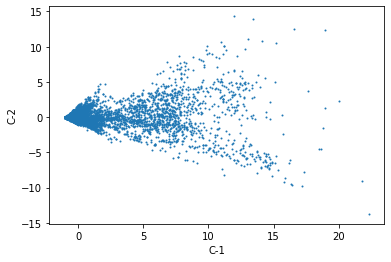

In [36]:
principalDf.plot.scatter("C-1", 
                        "C-2",
                        s=1
                       );

In [37]:
# Now we cluster the two components instead of all the input variables:

seed(12345)
estimator = KMeans(n_clusters = 5)
estimator.fit(principalDf)
k5_pca = pd.Series(estimator.labels_, 
                  index = principalDf.index)

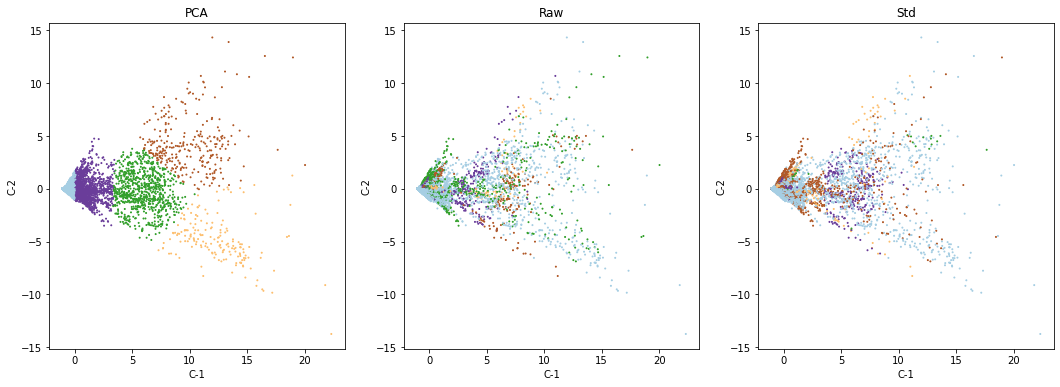

In [39]:
f, axs = plt.subplots(1, 3, figsize = (18,6))
ax = axs[0]

principalDf.assign(labels=k5_pca)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("PCA")


ax = axs[1]
principalDf.assign(labels=k5_raw)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("Raw")

ax = axs[2]
principalDf.assign(labels=k5_std)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("Std")

plt.show()


### Interpretation: 



#### PCA and Std somewhat similar. This shows that standardizing the scale helps the models perform better (clear division of clusters). 
#### However, The raw version seems to yield less clear divisions of clusters. 

## Quality of Clustering: Calinski and Harabasz Score
### Calinski and Harabasz score is the ratio between over within dispersion. 

In [356]:
chs_raw = calinski_harabasz_score(db[features], k5_raw)

In [357]:
chs_std = calinski_harabasz_score(db[features],
                                  k5_std)

In [358]:
chs_pca = calinski_harabasz_score(db[features], k5_pca)

In [359]:
pd.Series({"Raw": chs_raw,
               "Standardised": chs_std,
               "PCA": chs_pca,
              })

Raw             44469.918344
Standardised    23147.574438
PCA             24057.415411
dtype: float64

### The higher, the better, so original seems to perform significantly better than other two methods according to the calinski and harabasz score. 
### However, visual inspection of the graphs show that the original method did not yield clear divisions of clusters. This somehow implies that 
### the clusters defined by other two methods may not have meaningful information about the avocado comsumption behaviors. 




In [360]:
# Looking at one cluster

k5_concat = pd.concat([db, k5_raw], axis = 1)

k5_concat.rename(columns={0: "k5_raw"}, inplace=True)

k5_concat

,id,Date,AveragePrice,TotalVolume,Total_Volume_PLU_4046,Total_Volume_PLU_4225,Total_Volume_PLU_4770,TotalBags,SmallBags,LargeBags,XLargeBags,year,type,region,Month,k5_raw
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,conventional,Albany,12,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,conventional,Albany,12,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,conventional,Albany,12,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,conventional,Albany,12,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,conventional,Albany,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,organic,WestTexNewMexico,2,0
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,organic,WestTexNewMexico,1,0
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,organic,WestTexNewMexico,1,0
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,organic,WestTexNewMexico,1,0


In [361]:
k5_concat.query("k5_raw == 0")

,id,Date,AveragePrice,TotalVolume,Total_Volume_PLU_4046,Total_Volume_PLU_4225,Total_Volume_PLU_4770,TotalBags,SmallBags,LargeBags,XLargeBags,year,type,region,Month,k5_raw
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,conventional,Albany,12,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,conventional,Albany,12,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,conventional,Albany,12,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,conventional,Albany,12,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,conventional,Albany,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,organic,WestTexNewMexico,2,0
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,organic,WestTexNewMexico,1,0
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,organic,WestTexNewMexico,1,0
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,organic,WestTexNewMexico,1,0


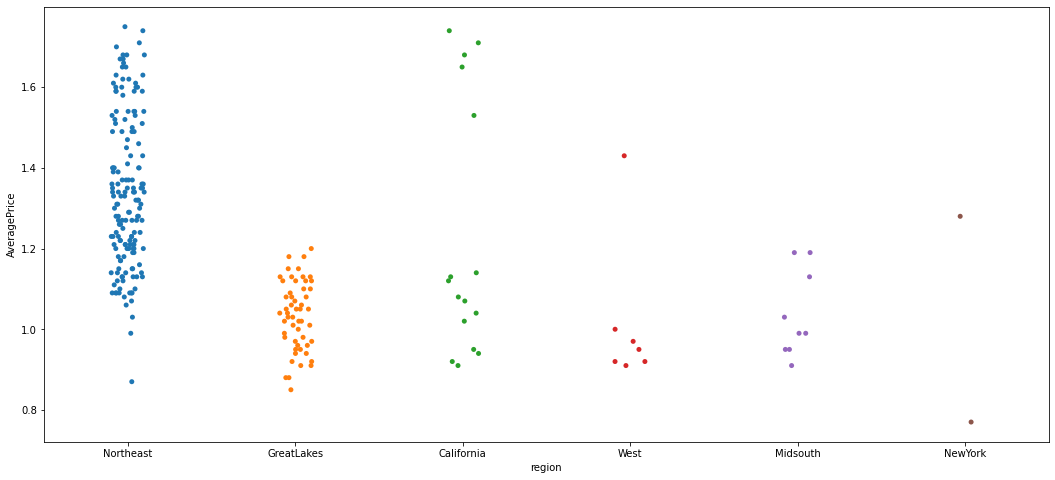

In [362]:


f, axs = plt.subplots(1,1, figsize = (18,8))


sns.stripplot(x = "region", 
              y = "AveragePrice",
              data = k5_concat.query("k5_raw == 2").sample(250));




### The stripplolt above implies that Great Lakes, Califonia and New York are similar in terms of avocado consumption behavior. 

# Quality of Clustering: Silhouette scores

In [363]:
sil_raw = silhouette_score(db[features], 
                           k5_raw,
                           metric="euclidean"
                          )

In [364]:
sil_std = silhouette_score(db[features], 
                           k5_std,
                           metric="euclidean"
                          )

In [365]:
sil_pca = silhouette_score(db[features], 
                           k5_pca,
                           metric="euclidean"
                          )

In [366]:
pd.Series({"Raw": sil_raw,
               "Standardised": sil_std,
               "PCA": sil_pca,
              })

Raw             0.700818
Standardised    0.683563
PCA             0.676068
dtype: float64

# Quality of Clustering: Davies-Bouldin Index

In [367]:
from sklearn.metrics import davies_bouldin_score

In [368]:
dbi_raw = davies_bouldin_score(db[features], k5_raw)

In [369]:
dbi_std = davies_bouldin_score(db[features], k5_std)

In [370]:
dbi_pca = davies_bouldin_score(db[features], k5_pca)

In [371]:
pd.Series({"Raw": dbi_raw,
               "Standardised": dbi_std,
               "PCA": dbi_pca,
              })

Raw             0.810743
Standardised    2.211983
PCA             1.753309
dtype: float64

# 3 - Supervised learning

### Linear Regression-The Econometrician way

#### By using regression analysis, I want to predict the future price of avocado in the chosen region in 2019+. 
#### A predictive mode will be built and then I will Interpret the coefficient, Evaluate its predictive performance both with and without cross-validation
#### , and Reflect on the differences between assessing the performance of a model cross-validating and not.


<AxesSubplot:ylabel='Density'>

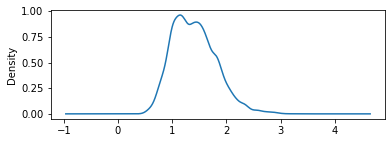

In [372]:
import statsmodels.formula.api as sm


f = "AveragePrice ~  TotalVolume + Month+ year + SmallBags + LargeBags"
lm_raw = sm.ols(f, db)\
       .fit()
lm_raw

# First, let's look at the distribution of the Avocado Prices

db.AveragePrice.plot.kde(figsize=(6,2))


#### The KDE plot shows that the data is slightly skewed to the left. When taking the log of the Price, it yields a better fit. 

<AxesSubplot:ylabel='Density'>

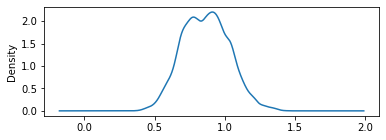

In [373]:
np.log1p(db.AveragePrice).plot.kde(figsize=(6,2))

In [374]:
# I assume that Avocado Prices could vary by Year that is sold, Total Volume, year, SmallBags, LargeBags, type, region_n. This is just a test-out to see how it performs. 
f = "np.log1p(AveragePrice) ~  TotalVolume + year + SmallBags + LargeBags + avocado_type_ds + region_ds"
lm_log = sm.ols(f, db)\
       .fit()
lm_log


In [375]:
# Get Rsquared value; 

lm_log.rsquared

0.575152851009396

In [376]:
lm_raw.rsquared 

0.159265682620214

#### Both lm_log and lm_raw can only explain about 15% and 57% of the results, respectively. This is very poor performance. There would be no point of getting predictions using this model. Again, This is just a test-out result. 



### Linear Regression - The Machine Learner way

In [435]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.pipeline import Pipeline
from sklearn. preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


In [436]:
# Prep X and y 

features = ['Month','TotalVolume','Total_Volume_PLU_4046', 'Total_Volume_PLU_4225', 'Total_Volume_PLU_4770',
           'TotalBags','SmallBags','LargeBags','XLargeBags' ,'year']


X = pd.concat([db[features], avocado_type_ds, region_ds], axis = 1)
X.head()

y = db['AveragePrice']

In [437]:
X.columns

Index(['Month', 'TotalVolume', 'Total_Volume_PLU_4046',
       'Total_Volume_PLU_4225', 'Total_Volume_PLU_4770', 'TotalBags',
       'SmallBags', 'LargeBags', 'XLargeBags', 'year', 'conventional',
       'organic', 'Albany', 'Atlanta', 'BaltimoreWashington', 'Boise',
       'Boston', 'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver', 'Detroit',
       'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewOrleansMobile', 'NewYork', 'Northeast',
       'NorthernNewEngland', 'Orlando', 'Philadelphia', 'PhoenixTucson',
       'Pittsburgh', 'Plains', 'Portland', 'RaleighGreensboro',
       'RichmondNorfolk', 'Roanoke', 'Sacramento', 'SanDiego', 'SanFrancisco',
       'Seattle', 'SouthCarolina', 'SouthCentral', 'Southeast', 'Spokane',
       'StLoui

In [438]:
# Split Train (used in the learning stage) and Test(the prediction stage) dataset; 

    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)



In [439]:
# Linear regression on the raw price

regressor = LinearRegression()
regressor.fit(X_train, y_train)
pd.Series(regressor.coef_,
              index=X_train.columns
             )
y_pred_lr_raw = regressor.predict(X_test)
y_pred_lr_raw

array([1.63916795, 1.67561905, 0.92809663, ..., 1.074726  , 1.65277344,
       1.0830209 ])

In [440]:
# Linear Regression on log of the price

regressor_log = LinearRegression()
regressor.fit(X_train, np.log1p(y_train))
pd.Series(regressor.coef_,
              index=X_train.columns
             )
y_pred_lr_log = regressor.predict(X_test)
y_pred_lr_log

array([0.95459317, 0.97364667, 0.64155064, ..., 0.71543864, 0.96464455,
       0.73437967])

In [441]:
# Set up a model using pipeline - Raw 

pipe0 = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipe0.fit(X_train, y_train)
y_pred_lr = pipe0.predict(X_test)

In [442]:
r2_score(y_test, y_pred_lr)

0.5763197875155102

In [443]:
mae(y_test,y_pred_lr)

0.1969935871703353

In [447]:
mse_lr = mse(y_test, y_pred_lr)
mse_lr

0.06808573168076033

In [449]:
np.sqrt(mse_lr)

0.26093242742281064

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

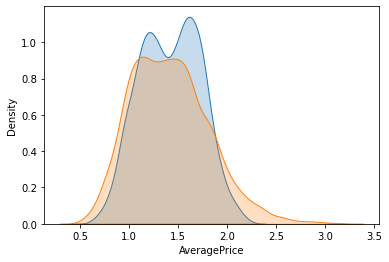

In [451]:
sns.kdeplot(y_pred_lr, shade = True)# Blue
sns.kdeplot(y_test, shade = True) # Orange 

### Tree-based approaches: the Random Forest

In [452]:
from sklearn.ensemble import RandomForestRegressor

In [453]:
# Random Forest on the raw price

rf_raw = RandomForestRegressor(n_estimators=100,
                               max_features=None
                              )

rf_raw.fit(X_train, y_train)
y_pred_rf_raw = rf_raw.predict(X_test)
y_pred_rf_raw

array([1.862 , 1.3624, 0.6146, ..., 1.0705, 1.8401, 1.0939])

In [454]:
# Random Forest on the log of price

rf_log = RandomForestRegressor(n_estimators=100,
                               max_features=None
                              )

rf_log.fit(X_train, np.log1p(y_train))
y_pred_rf_log = rf_log.predict(X_test)
y_pred_rf_log

array([1.06710616, 0.84384146, 0.4751243 , ..., 0.71706561, 1.04142887,
       0.75812343])

In [455]:
# Pipeline approach - Raw 

pipe1 = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor())])
pipe1.fit(X_train, y_train)
y_pred_rf = pipe1.predict(X_test)

In [456]:
r2_score(y_test, y_pred_rf)

0.8941929846111091

In [457]:
mae(y_test,y_pred_rf)

0.0905802813756141

In [458]:
mse_rf = mse(y_test,y_pred_rf)


In [459]:
np.sqrt(mse_rf)

0.13039657844757732

In [460]:
# Let's record all the predictions in a single table for convinience. 

In [461]:
res = pd.DataFrame({"LR-Raw": y_pred_lr_raw,
                    "LR-Log": y_pred_lr_log,
                    "RF-Raw": y_pred_rf_raw,
                    "RF-Log": y_pred_rf_log,
                    "Truth": y_test
                       })
res.head()

,LR-Raw,LR-Log,RF-Raw,RF-Log,Truth
11594,1.639168,0.954593,1.8620,1.067106,2.07
15852,1.675619,0.973647,1.3624,0.843841,1.26
4554,0.928097,0.641551,0.6146,0.475124,0.58
17880,1.559651,0.928342,1.4759,0.897014,1.43
5797,1.166316,0.760254,1.4974,0.906742,1.54


## Inference

Text(0.5, 1.0, 'Random Forest')

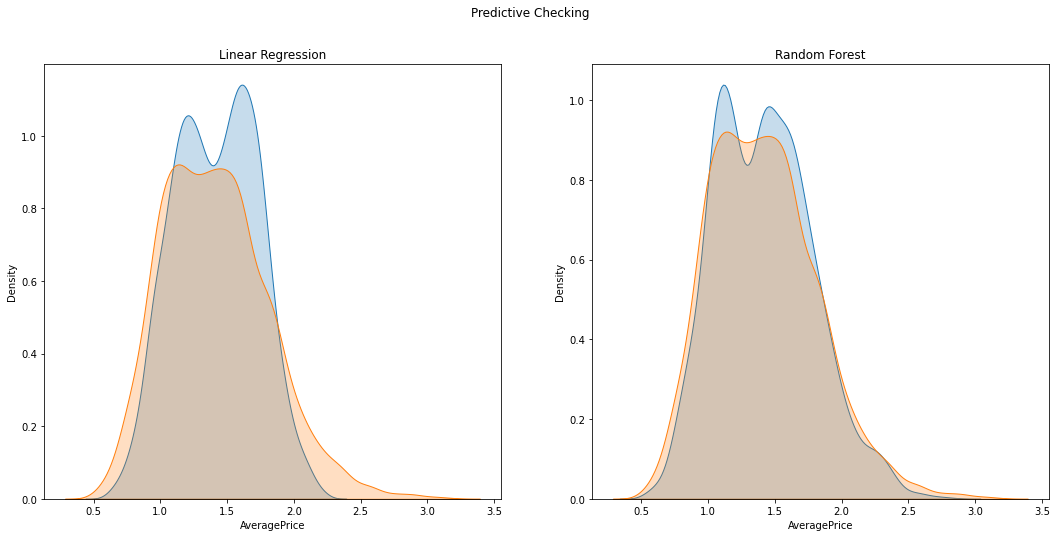

In [462]:
f, axs = plt.subplots(1, 2, figsize = (18,8))

f.suptitle('Predictive Checking')

ax = axs[0]

sns.kdeplot(ax =  axs[0], data = y_pred_lr, shade =  True) #Blue
sns.kdeplot(ax = axs[0], data = y_test, shade =  True) # Orange

ax.set_title("Linear Regression")

ax = axs[1]

sns.kdeplot(ax = axs[1], data = y_pred_rf, shade = True) # Blue
sns.kdeplot(ax = axs[1], data = y_test, shade = True) # Orange 

ax.set_title("Random Forest")


#### By comparing the Rsquared score from Linear Regression and Random Forest, Random Forest seems to perform significantly better than the Linear Regression model. Linear Regression model 
#### only accounts for 57% of r2 while Random Forest model accounts for 89% r2. 


### Dimensionality Reduction
#### I want to know if the model will perform better after reducing the dimension of the data using PCA analysis 

In [463]:
pca_estimator = PCA(n_components = 5)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_estimator.fit_transform(X), y, test_size = 0.25, random_state=0)


In [464]:
# pipeline 

pipe_pca_rf = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor())])
                        
pipe_pca_rf.fit(X_train_pca,y_train_pca)

y_pred_pca_rf = pipe_pca_rf.predict(X_test_pca)


In [465]:
r2_score(y_test_pca, y_pred_pca_rf)

0.6781018596428002

### By reducing the data dimension, we lose 21% of Rsquared. It is better to keep all the features in the analysis. 

## Overfitting & Cross-Validation

###

### R-Squared

In [534]:
r2_lr_raw = r2_score(y_test, y_pred_lr_raw)
r2_lr_raw

0.5762001723744739

In [535]:
r2_lr_log = r2_score(y_test, y_pred_lr_log)
r2_lr_log

-1.4711731058453665

In [536]:
r2_rf_raw = r2_score(y_test, y_pred_rf_raw)
r2_rf_raw

0.8965662680112129

In [537]:
r2_rf_log = r2_score(y_test, y_pred_rf_log)
r2_rf_log

-1.2807001299677734

In [566]:
r2_results = pd.DataFrame([r2_lr_raw, r2_lr_log, r2_rf_raw, r2_rf_log])
index = ["lr_raw", "lr_log", "rf_raw", "rf_log"]
label = "r2"

### MAE

In [539]:
mae_lr_raw = mae(y_test,y_pred_lr_raw)
mae_lr_raw

0.1970238554476629

In [540]:
mae_lr_log = mae(y_test,y_pred_lr_log)
mae_lr_log

0.5484967655931359

In [541]:
mae_rf_raw = mae(y_test,y_pred_rf_raw)
mae_rf_raw

0.0899751228226887

In [542]:
mae_rf_log = mae(y_test,y_pred_rf_log)
mae_rf_log

0.5442641575987783

In [543]:
mae_results = pd.DataFrame([mae_lr_raw, mae_lr_log, mae_rf_raw, mae_rf_log])

mae_results

,0
0,0.197024
1,0.548497
2,0.089975
3,0.544264


### MSE

In [544]:
mse_lr_raw = mse(y_test, y_pred_lr_raw)
mse_lr_raw

0.06810495392470184

In [545]:
mse_lr_log = mse(y_test, y_pred_lr_log)
mse_lr_log

0.3971193935035571

In [546]:
mse_rf_raw = mse(y_test, y_pred_rf_raw)
mse_rf_raw

0.01662187922733363

In [547]:
mse_rf_log = mse(y_test, y_pred_rf_log)
mse_rf_log

0.36651024172847274

In [548]:
mse_results = pd.DataFrame([mse_lr_raw, mse_lr_log, mse_rf_raw, mse_rf_log])
mse_results

,0
0,0.068105
1,0.397119
2,0.016622
3,0.366510


### RMSE

In [549]:
rmse_lr_raw = np.sqrt(mse_lr_raw)
rmse_lr_raw

0.26096925858173764

In [550]:
rmse_lr_log = np.sqrt(mse_lr_log)
rmse_lr_log

0.6301740977726371

In [551]:
rmse_rf_raw = np.sqrt(mse_rf_raw)
rmse_rf_raw

0.1289258671769697

In [552]:
rmse_rf_log = np.sqrt(mse_rf_log)
rmse_rf_log

0.6054008933991366

In [553]:
rmse_results = pd.DataFrame([rmse_lr_raw, rmse_lr_log, rmse_rf_raw, rmse_rf_log])
rmse_results

,0
0,0.260969
1,0.630174
2,0.128926
3,0.605401
